Name: Pratham Shewale Roll_no: TEBD22618

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

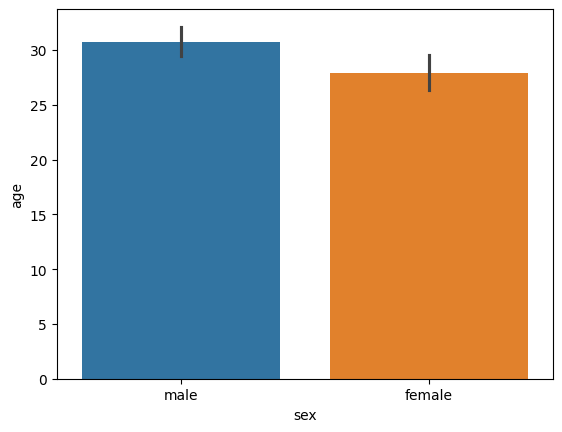

In [9]:
sns.barplot(x="sex", y="age", hue="sex", data = df)

<Axes: xlabel='sex', ylabel='age'>

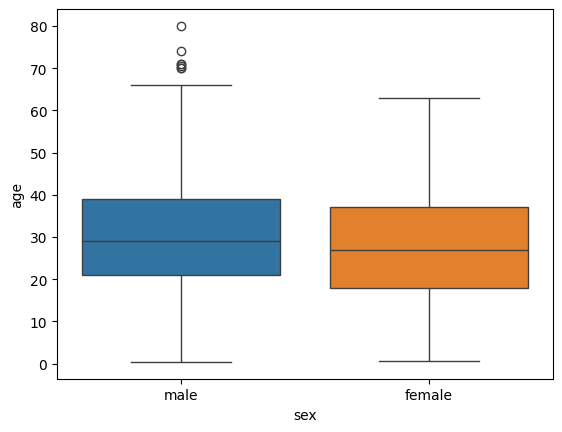

In [20]:
sns.boxplot(x = "sex", y = "age", hue="sex", data = df)

<Axes: xlabel='sex', ylabel='age'>

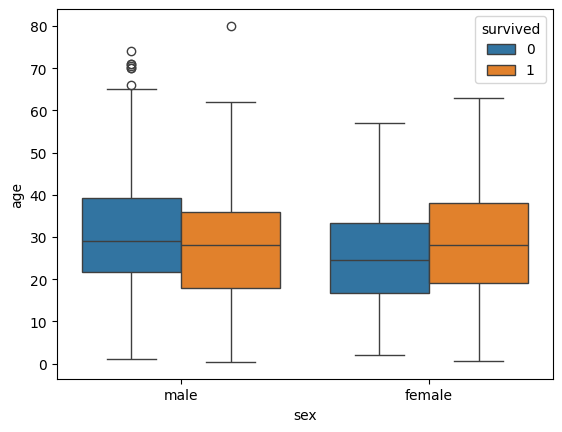

In [21]:
sns.boxplot(x = "sex", y = "age", hue="survived", data = df)

#### Observations:

For male passengers, those who did not survive had an age distribution mostly between 22 and 40, with a median around 30. Several outliers above age 65 indicate a few older non-survivors. Surviving males were generally younger, with a slightly lower median age, suggesting younger men had a better chance of survival.

Among female passengers, survivors had ages mostly between 18 and 45, with a median around 28–30. The age range was broader among surviving females, indicating more variation in age. This suggests survival among women was less dependent on age.

Overall, the plot shows females had higher survival rates than males. Younger males were more likely to survive than older ones.

In [22]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (714, 15)

Final cleaned data shape: (436, 15)


In [23]:
print(outliers_dict.keys())

dict_keys(['age', 'sibsp', 'parch', 'fare'])


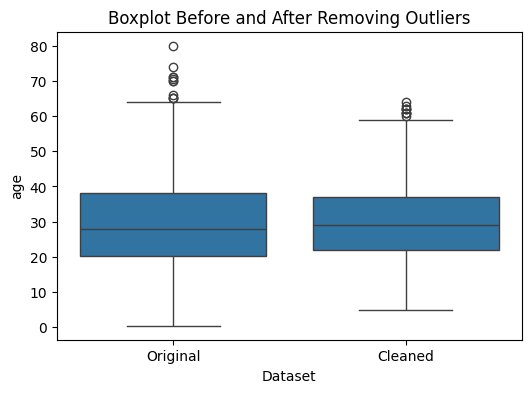

In [24]:
plot_df = pd.DataFrame({
    'age': pd.concat([
        df['age'],  # original
        df_clean['age'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='age', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()
